   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.4 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


API Key Loaded successfully
Fetching comments...
Analyzing...

--- Data Sentiment ---
Sentiment
Negative     6
Neutral     25
Positive    69
Name: count, dtype: int64

--- Data Preview ---
                                             Content Sentiment
0             sodara kita di timor kompak bgt sumpah  Positive
1  Dari jaman saling diss sama yl lagu lagu ecko ...  Negative
2  😢😢😢 banyak anak NTT berprestasi cuman minim fa...  Positive
3                        Itu musik nya dangdut timur   Neutral
4  Aah, Kereen Om Dedy..Terimakasih sudah buka ja...  Positive
5                  Seru nih. Mari kita goyang dunia.  Positive
6  Masyaallah Tabarakallah usahanya tidak mengkhi...  Positive
7  Musiknya itu khas.. Gerakan pas nari... Suaran...  Positive
8  Saya salaut dengan usaha dan kerja keras kamu ...  Positive
9  Musik sdh masuk perform di istana rumah RI-01 ...  Positive


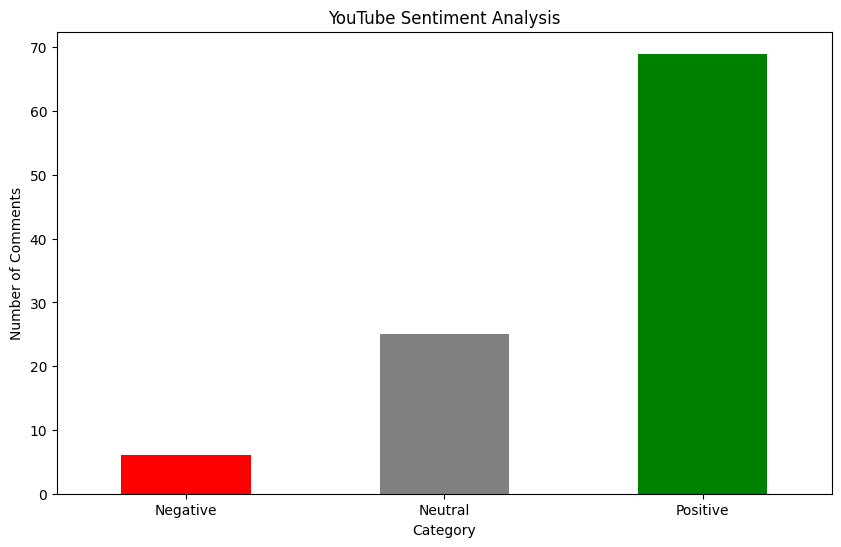

Saved to yt_sentiments.csv


In [1]:
!pip install deep-translator

import requests
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
from google.colab import userdata

nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

try:
 API_KEY = userdata.get('YOUTUBE_API_KEY')
 print("API Key Loaded successfully")
except:
 print("Failed: Check Secrets access")

def get_comments(video_id, api_key):
 comments = []
 token = None
 while True:
     url = 'https://www.googleapis.com/youtube/v3/commentThreads'
     params = {
         'part': 'snippet',
         'videoId': video_id,
         'key': api_key,
         'maxResults': 100,
         'textFormat': 'plainText',
         'pageToken': token
     }
     response = requests.get(url, params=params)
     if response.status_code != 200: break
     data = response.json()
     for item in data.get('items', []):
         snippet = item['snippet']['topLevelComment']['snippet']
         comments.append({
             'Author': snippet['authorDisplayName'],
             'Content': snippet['textDisplay']
         })
     token = data.get('nextPageToken')
     if not token: break
 return comments

def analyzer(text):
 try:
     clean_text = re.sub(r"http\S+|[^a-zA-Z0-9\s.,!?]", '', str(text))
     translated = GoogleTranslator(source='auto', target='en').translate(clean_text)
     scores = vader.polarity_scores(translated)
     compound = scores['compound']
     if compound >= 0.05: return 'Positive'
     elif compound <= -0.05: return 'Negative'
     else: return 'Neutral'
 except:
     return 'Neutral'

if __name__ == '__main__':
 VIDEO_ID = 'F9dwQP4sbKI'
 print("Fetching comments...")
 yt_data = get_comments(VIDEO_ID, API_KEY)
 df = pd.DataFrame(yt_data)

 if not df.empty:
     print("Analyzing...")
     df = df.head(100)
     df['Sentiment'] = df['Content'].apply(analyzer)

     print("\n--- Data Sentiment ---")
     counts = df['Sentiment'].value_counts().reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)
     print(counts)

     print("\n--- Data Preview ---")
     print(df[['Content', 'Sentiment']].head(10))

     plt.figure(figsize=(10, 6))
     colors = ['red', 'gray', 'green']

     counts.plot(kind='bar', color=colors)
     plt.title('YouTube Sentiment Analysis')
     plt.xlabel('Category')
     plt.ylabel('Number of Comments')
     plt.xticks(rotation=0)
     plt.show()

     df.to_csv('yt_sentiments.csv', index=False)
     print("Saved to yt_sentiments.csv")
 else:
     print("No data found")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Fetching reviews...
Analyzing...

--- Data Sentiment ---
Sentiment
Negative    63
Neutral     15
Positive    22
Name: count, dtype: int64

--- Data Preview ---
                    Author                                            Content  \
0          Karsidi Karsidi  apk sampah daftar jg susah masukin capcha sala...   
1          Firdy Nur Rohim          aplikasi ribet mau nge cek data aja susah   
2               Sonto Loyo  apapun itu yg berbau pemerintah kenapa sulit d...   
3                 a husein  Aplikasi yang sangat bagus sekali, sekelas neg...   
4           Nadya Salfitri  entah aplikasi apa, mau bikin akun captcha sal...   
5                Gazis Aku  Apk judol lebih bagus daripada apk ini, captch...   
6  sang naga telah kembali                                  aplikasi gak guna   
7            Elisa Wiliana  captcha salah terus pdhl udah bener aplikasi s...   
8              Adam Sutejo  tidak kantor tidak aplikasi sama sama tidak be...   
9      Andi Zulfikar Muspa    

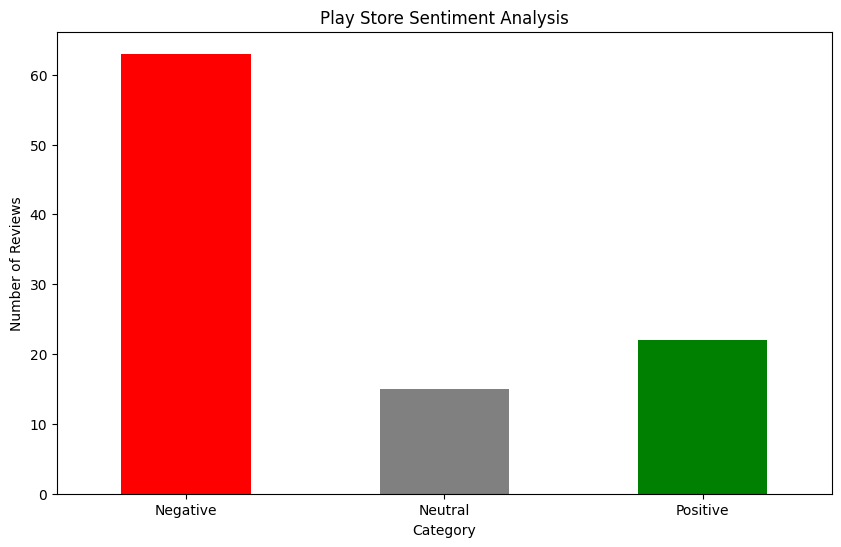

Successfully saved to ps_sentiments.csv


In [2]:
!pip install google-play-scraper deep-translator nltk pandas matplotlib

import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from google_play_scraper import reviews, Sort
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')
vader = SentimentIntensityAnalyzer()

def analyzer(text):
    try:
        clean_text = re.sub(r"http\S+|[^a-zA-Z0-9\s.,!?]", '', str(text))
        translated = GoogleTranslator(source='auto', target='en').translate(clean_text)
        scores = vader.polarity_scores(translated)
        compound = scores['compound']

        if compound >= 0.05: return 'Positive'
        elif compound <= -0.05: return 'Negative'
        else: return 'Neutral'
    except:
        return 'Neutral'

if __name__ == '__main__':
    print("Fetching reviews...")

    result, _ = reviews(
        'ojk.mobileappppid',
        lang='id',
        country='id',
        sort=Sort.NEWEST,
        count=100
    )

    if result:
        df = pd.DataFrame(result)
        df = df.head(100)

        df = df[['userName', 'content', 'at', 'score']].rename(columns={
            'userName': 'Author',
            'content': 'Content',
            'at': 'PublishedAt',
            'score': 'Rating_star'
        })

        print("Analyzing...")
        df['Sentiment'] = df['Content'].apply(analyzer)

        print("\n--- Data Sentiment ---")
        counts = df['Sentiment'].value_counts().reindex(['Negative', 'Neutral', 'Positive'], fill_value=0)
        print(counts)

        print("\n--- Data Preview ---")
        print(df[['Author', 'Content', 'Sentiment']].head(10))

        plt.figure(figsize=(10, 6))
        colors = ['red', 'gray', 'green']
        counts.plot(kind='bar', color=colors)
        plt.title('Play Store Sentiment Analysis')
        plt.xlabel('Category')
        plt.ylabel('Number of Reviews')
        plt.xticks(rotation=0)
        plt.show()

        df.to_csv('ps_sentiments.csv', index=False, encoding='utf-8')
        print("Successfully saved to ps_sentiments.csv")
    else:
        print("Data not found")
